# Mean-field modelling using ordinary differential equations.

_Original Assignment by: Rick Quax_

_Adapted by: Tristan Laan_

This notebook contains a mix of problems that you must solve analytically and problems to tackle numerically.

**Name:** Yujia Liu \
**UvANetID:** 14806762

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Hand-in notes
This assignment is partially auto-graded. This means we can check your solutions more quickly, but also means that your assignment must adhere to some format. To accomplish this, make sure you follow the following rules. **Please read these rules before starting the assignment.**

- Do **not** add or remove cells in this notebook. This can break the AutoTest. Note: if you accidentally create a new cell, you can safely delete the cell.

- **Only** edit cells that contain instructions to do so, more specifically only put your answers in cells that say "YOUR ANSWER/CODE HERE".

- Do **not** edit function names. This can break the AutoTest. You can however add helper functions, but **make sure** to put them in the same cells.

- Do **not** edit the cell tags. This can break the AutoTest.

- CodeGrade will run all cells in this notebook automatically, so please make sure that the notebook you hand in is cleared, i.e. select *Cell→All Outputs→Clear*.

- Don't worry if you do not manage to pass all asserts before you hand-in the assignment. CodeGrade will execute all the cells, even if there's an Exception.

- The assignment **has** to be handed in as a single Jupyter Notebook file named `ode-2023.ipynb`.

- After submitting the notebook, **make sure** you passed the Hand-in check of the AutoTest. Also make sure the notebook in the AutoTest output (only visible after the AutoTest is completed) looks correct.

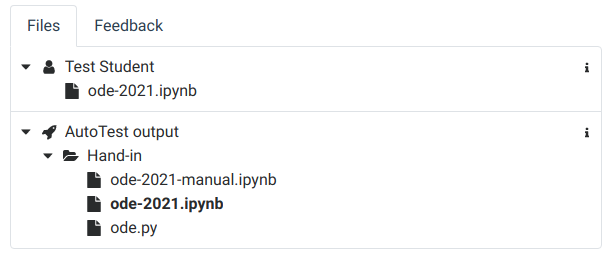
<p style="text-align: center; font-style: italic">Location of the AutoTest output in the CodeGrade Filebrowser</p>

- Do **not** use Jupyter alternatives, like Google Collab or VSCode, they are known to remove Cell metadata, which is needed for the AutoTest. They also lack the ability to attach images.

## Inserting Images
When you are asked to insert an image, you **must** embed them in the cell as attachment. You can do this by selecting *Edit→Insert Image* from the Toolbar in Jupyter. To view all attachments in a cell you can enable the Attachment cell toolbar by selecting *View→Cell Toolbar→Attachments*.
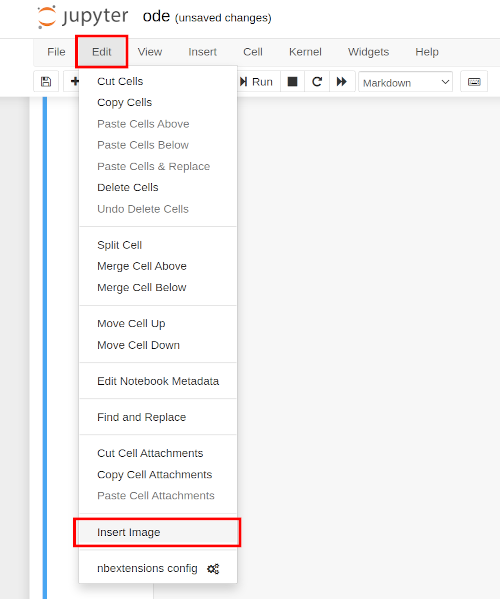
<p style="text-align: center; font-style: italic">Insert Image toolbar option</p>


## General notes
- You will check your own analytical solutions by also performing the numerical solution, so if you are not sure about your own mathematical derivations you can continue and check back later using the numerical solution.

- When you are asked for a derivation or a solution then **always** show clearly the steps which you made to arrive at it. You can work it out on a notepad first, then type a clean version in your answer sheet. You can use $\LaTeX$ by enclosing it with `$`-signs, so: `$\LaTeX$`.

- If you are asked to draw a figure in an analytical question, you may use any program to generate it, and you may include it as a picture in this notebook. If you are asked to draw a figure in a numerical question, you **must** generate it using Python in this notebook. In any case, remember to identify the important features in your figures.

## Table of contents
- [0. Analytical ODE solution example](#0.-Analytical-ODE-solution-example)
- [1. Euler algorithm](#1.-Euler-algorithm)
- [2. Proteins](#2.-Proteins)
- [3. Rabbit population](#3.-Rabbit-population)

## 0. Analytical ODE solution example
Sometimes you will be asked to first derive a solution of an ODE, and then enter it in a code cell used for automatic grading. In this code cell there will be a function that contains all needed parameters, and you can use numpy functions like `np.e`, `np.pi`, etc. for general math equations.

Let's for example assume you have derived the solution $x(t)=C \cdot e^{3a + t} - b$ of an ODE. Now, you should enter your solution in the code cell like this:

In [7]:
def a0_x(t, a, b, C):
    return C * np.e ** (3 * a + t) - b

There will be an included check cell that at least checks if your output has the correct format, but it will **not** check if your answer is correct. This check will look something like this:

In [8]:
_x = a0_x(np.array([1, 2, 3]), 1, 1, 1)
assert isinstance(_x, np.ndarray), "Your function should return a numpy array"
assert _x.shape == (3, ), "Your function should return a numpy array that has the same shape as t"

The actual AutoTest on CodeGrade will later check if your solution was correct.

## 1. Euler algorithm

### 1a. Implementing the simple Euler algorithm (Numerical)
Implement the simple Euler algorithm for estimating the solution $x(t)$ of a given single ODE $dx/dt = f(x, t)$.

In [209]:
def euler(f, x0, t0, t_end, dt):
    """Euler method to estimate x(t) given f(x, t) with initial value x0 from t=t0,
    until t=t_end with a time step of dt.
    """
    # Determine all time steps `t` beforehand
    t = np.arange(t0, t_end, dt)
    x = []
    
    # YOUR CODE HERE
    # You can call the function f like `xt = f(xi, ti)`
    # Initialize the current value of x
    xi = x0
    
    # We need to check if f takes 1 or 2 arguments (x, t)
    # I try calling it once with both arguments. 
    # If it fails with TypeError, we assume it only accepts x.
    two_args = True
    try:
        f(xi, t[0])
    except TypeError:
        two_args = False
    
    for ti in t:
        x.append(xi)
        
        # Adaptive call based on the check above
        if two_args:
            slope = f(xi, ti)
        else:
            slope = f(xi)
            
        xi = xi + slope * dt
    
    return t, np.array(x)

In [210]:
_t, _x = euler((lambda x, t: x + t), 0, 0, 1, 0.1)
assert isinstance(_t, np.ndarray) and isinstance(_x, np.ndarray), "t and x must be a numpy array"
assert _t.shape == (10,) and _x.shape == (10,), "length of t or x is incorrect"
assert np.allclose(_t, np.arange(0, 1, 0.1)), "t should follow the behaviour of `numpy.arange`"

In [211]:
# You can add more tests here if you want to

### 1b. Solving three ODEs (Analytical)
Solve each of the following three ODEs analytically:
- f1: $dx/dt = 1$, with $x(0)=0$,
- f2: $dx/dt = 2t$, with $x(0)=-4$
- f3: $dx/dt = -x$, with $x(0)=4$

Show how you derived the functions first, and then enter them in the code cell.

YOUR ANSWERS HERE 
- f1: $dx/dt = 1$, with $x(0)=0$<br>
Step 1:$$dx = 1 \cdot dt$$Step 2:$$\int dx = \int 1 \, dt$$$$x(t) = t + C$$Step 3 ($t=0$ and $x=0$):$$0 = 0 + C \implies C = 0$$Result:$$x(t) = t$$<br><br>
- f2: $dx/dt = 2t$, with $x(0)=-4$<br>
Step 1:$$dx = 2t \, dt$$Step 2 (using $\int t^n dt = \frac{t^{n+1}}{n+1}$):$$\int dx = \int 2t \, dt$$$$x(t) = 2 \cdot \frac{t^2}{2} + C$$$$x(t) = t^2 + C$$Step 3 ($t=0$ and $x=-4$):$$-4 = (0)^2 + C \implies C = -4$$Result:$$x(t) = t^2 - 4$$<br><br>
- f3: $dx/dt = -x$, with $x(0)=4$<br>
Step 1:$$\frac{1}{x} dx = -dt$$Step 2 (using $\int \frac{1}{x} dx = \ln|x|$):$$\int \frac{1}{x} dx = \int -1 \, dt$$$$\ln|x| = -t + C_1$$Step 3:$$|x| = e^{-t + C_1}$$$$x(t) = \pm e^{C_1} e^{-t}$$Let $C = \pm e^{C_1}$:$$x(t) = C e^{-t}$$Step 4 ($t=0$ and $x=4$):$$4 = C e^{0}$$$$C = 4$$Result:$$x(t) = 4e^{-t}$$

In [220]:
def a1b_f1(t):
    # YOUR CODE HERE
    return t

def a1b_f2(t):
    # YOUR CODE HERE
    return t**2 - 4

def a1b_f3(t):
    # YOUR CODE HERE
    return 4 * np.exp(-t)

In [221]:
for f in (a1b_f1, a1b_f2, a1b_f3):
    _x = f(np.array([1, 2, 3]))
    assert isinstance(_x, np.ndarray), "Your function should return a numpy array"
    assert _x.shape == (3, ), "Your function should return a numpy array that has the same shape as t"

### 1c. Validating your Euler implementation (Numerical)
Validate your Euler implementation on the ODEs from the previous question against your analytical results. Experiment with different values for the time step, $\Delta t = 1$, $\Delta t = 0.1$ and $\Delta t = 0.01$. Do this by plotting both the analytical solution and the numerical approximation in the same figure. For which equation(s) does your result improve?

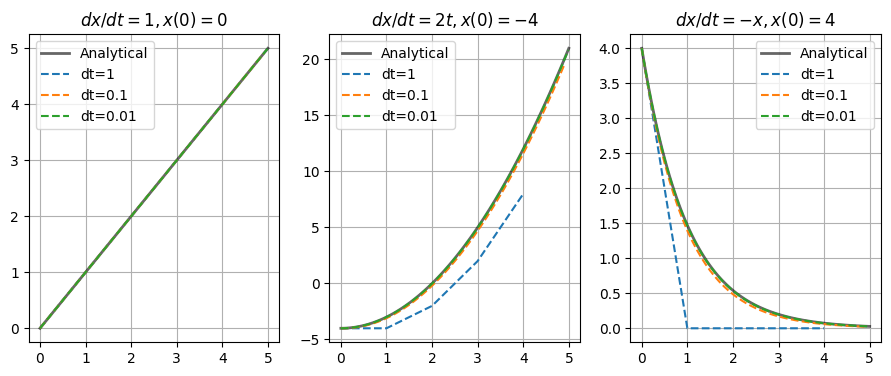

In [223]:
plt.figure(figsize=(11, 4))
plt.tight_layout()

plt.subplot(1, 3, 1)
# ADD YOUR PLOT CODE FOR f1 HERE
t_exact = np.linspace(0, 5, 100)
x_exact = a1b_f1(t_exact)
plt.plot(t_exact, x_exact, 'k-', linewidth=2, alpha=0.6, label='Analytical')

for dt in [1, 0.1, 0.01]:
    t, x = euler(lambda x, t: 1, 0, 0, 5, dt)
    plt.plot(t, x, '--', label=f'dt={dt}')

plt.title('$dx/dt = 1, x(0)=0$')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
# ADD YOUR PLOT CODE FOR f2 HERE
x_exact_2 = a1b_f2(t_exact)
plt.plot(t_exact, x_exact_2, 'k-', linewidth=2, alpha=0.6, label='Analytical')

for dt in [1, 0.1, 0.01]:
    t, x = euler(lambda x, t: 2*t, -4, 0, 5, dt)
    plt.plot(t, x, '--', label=f'dt={dt}')

plt.title('$dx/dt = 2t, x(0)=-4$')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
# ADD YOUR PLOT CODE FOR f3 HERE
x_exact_3 = a1b_f3(t_exact)
plt.plot(t_exact, x_exact_3, 'k-', linewidth=2, alpha=0.6, label='Analytical')

for dt in [1, 0.1, 0.01]:
    t, x = euler(lambda x, t: -x, 4, 0, 5, dt)
    plt.plot(t, x, '--', label=f'dt={dt}')

plt.title('$dx/dt = -x, x(0)=4$')
plt.legend()
plt.grid(True)

plt.show();

ADD YOUR ANALYSIS HERE

You now have a (crude) tool with which you can later check your analytical results. If we ask you to check your answer numerically, we expect you to use your Euler function (or Runge-Kutta, if you have implemented it).

### 1d. Bonus: Runge-Kutta method (Numerical)
For bonus: also implement the second order Runge-Kutta method and compare it to the Euler implementation by repeating the experiments from 1c, but only with $\Delta t= 1$ and $\Delta t= 0.1$.

In [183]:
def rk2a(f, x0, t0, t_end, dt):
    """Second order Runge-Kutta method to estimate x(t) given f(x, t) with initial value x0 from t=t0,
    until t=t_end with a time step of dt.
    """
    # Determine all time steps `t` beforehand
    t = np.arange(t0, t_end, dt)
    x = []
    
    # YOUR CODE HERE
    xi = x0
    
    for ti in t:
        # append current x value to the list
        x.append(xi)
        
        # calculate slope at the beginning of the interval (k1)
        k1 = f(xi, ti)
        
        # calculate slope at the midpoint (k2)
        # estimate the position at the midpoint using k1
        t_mid = ti + dt / 2
        x_mid = xi + k1 * (dt / 2)
        k2 = f(x_mid, t_mid)
        
        # update xi using the midpoint slope (k2)
        xi = xi + k2 * dt
    
    return t, np.array(x)

In [184]:
_t, _x = rk2a((lambda x, t: x + t), 0, 0, 1, 0.1)
assert isinstance(_t, np.ndarray) and isinstance(_x, np.ndarray), "t and x must be a numpy array"
assert _t.shape == (10,) and _x.shape == (10,), "length of t or x is incorrect"
assert np.allclose(_t, np.arange(0, 1, 0.1)), "t should follow the behaviour of `numpy.arange`"

In [185]:
# You can add more tests here if you want to

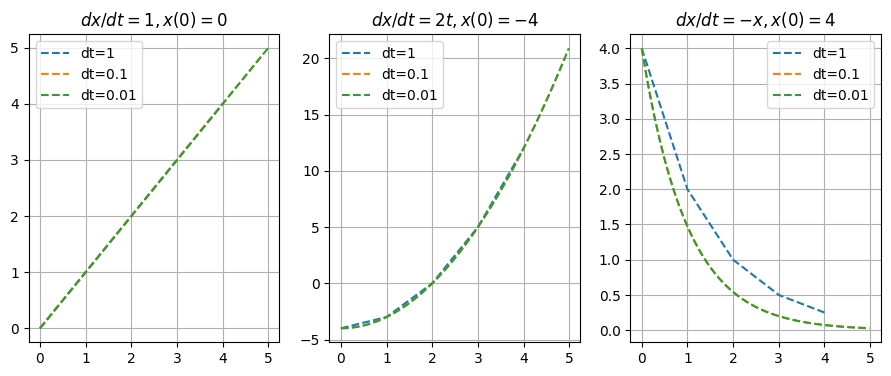

In [186]:
plt.figure(figsize=(11, 4))
plt.tight_layout()

plt.subplot(1, 3, 1)
# ADD YOUR PLOT CODE FOR f1 HERE
for dt in [1, 0.1, 0.01]:
    t, x = rk2a(lambda x, t: 1, 0, 0, 5, dt)
    plt.plot(t, x, '--', label=f'dt={dt}')

plt.title('$dx/dt = 1, x(0)=0$')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
# ADD YOUR PLOT CODE FOR f2 HERE
for dt in [1, 0.1, 0.01]:
    t, x = rk2a(lambda x, t: 2*t, -4, 0, 5, dt)
    plt.plot(t, x, '--', label=f'dt={dt}')

plt.title('$dx/dt = 2t, x(0)=-4$')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
# ADD YOUR PLOT CODE FOR f3 HERE
for dt in [1, 0.1, 0.01]:
    t, x = rk2a(lambda x, t: -x, 4, 0, 5, dt)
    plt.plot(t, x, '--', label=f'dt={dt}')

plt.title('$dx/dt = -x, x(0)=4$')
plt.legend()
plt.grid(True)

plt.show();

ADD YOUR ANALYSIS HERE

## 2. Proteins
Consider the concentration of a specific protein over time in a biological cell, denoted $x(t)$. Assume that these protein molecules are generated at a constant rate (increasing the concentration). Each protein also has a constant rate at which it degrades (decreasing the concentration). Thus we can model this simple system by the ODE

$$ \frac{dx}{dt} = g-k \cdot x. $$

In [187]:
def dx2(x, g, k):
    """The ODE model. Can be useful for your numerical solutions."""
    return g - k * x

### 2a. Parameters (Analytical)
Mention briefly the role of $g$ and the role of $k$ in this model.

YOUR ANSWER HERE\
$g$ is the protein synthesis rate, reflecting the constant flux of new proteins produced by genes through transcription and translation; while $k$ is the first-order degradation rate constant, directly determining the protein's half-life and the response time required for the cell to regulate its concentration to a new steady state.

### 2b. Explicit solution (Analytical)
Find an explicit solution for $x(t)$ in the general case with an additional constant $C$. The constant $C$ has to be simplified to the simplest form! ($C_0$ in the reference pdf.) Show how you derived your solution first, and then enter it in the code cell.

YOUR ANSWER HERE\
$$ \frac{dx}{dt} = g-k \cdot x $$
Step 1:$$\frac{1}{g - k \cdot x} dx = dt$$Step 2 (using u-substitution):$$\int \frac{1}{g - k \cdot x} dx = \int 1 \, dt$$$$-\frac{1}{k} \ln|g - k \cdot x| = t + C_1$$$$g - k \cdot x = C e^{-k t}$$ 
Result:$$x(t) = \frac{g}{k} + {C_0} e^{-k t}$$

In [188]:
def a2b_x(t, g, k, C):
    # YOUR CODE HERE
    return (g / k) + C * np.exp(-k * t)

In [189]:
_x = a2b_x(np.array([1, 2, 3]), 1, 1, 1)
assert isinstance(_x, np.ndarray), "Your function should return a numpy array"
assert _x.shape == (3, ), "Your function should return a numpy array that has the same shape as t"

### 2c. Additional constant (Analytical)
Explain briefly what the role is of the additional constant $C$ in your solution.

YOUR ANSWER HERE\
The constant $C$ represents the initial distance from equilibrium.

### 2d. Solving the ODE (Analytical)
Now solve this ODE assuming the initial condition: $x(0)=0$. In the remaining questions we will assume this solution.

YOUR ANSWER HERE\
$$\frac{dx}{dt} = g-k \cdot x$$
(with $x(0)=0$)<br>
Step 1:<br>
From the previous derivation, we know the general form is:
$$x(t) = \frac{g}{k} + C e^{-kt}$$
Step 2:
$$0 = \frac{g}{k} + C \cdot e^{0}$$
$$0 = \frac{g}{k} + C \implies C = -\frac{g}{k}$$
Step 3:
$$x(t) = \frac{g}{k} + \left(-\frac{g}{k}\right) e^{-kt}$$
$$x(t) = \frac{g}{k} - \frac{g}{k} e^{-kt}$$
Result:
$$x(t) = \frac{g}{k} \left( 1 - e^{-kt} \right)$$

In [190]:
def a2d_x(t, g, k):
    # YOUR CODE HERE
    return (g / k) * (1 - np.exp(-k * t))

In [191]:
_x = a2d_x(np.array([1, 2, 3]), 1, 1)
assert isinstance(_x, np.ndarray), "Your function should return a numpy array"
assert _x.shape == (3, ), "Your function should return a numpy array that has the same shape as t"

### 2e. Plotting four curves (Analytical)
Plot the following four curves of $x(t)$ versus $t$ in the same figure, over the range $0 \leq t \leq 5$. (Can you already guess how $g$ and $k$ determine the long-term behavior?)
- $g=2, k=3$
- $g=1, k=1.5$
- $g=2, k=2$
- $g=1, k=1$

You may either add code to plot the figure below, or insert an image containing your figure.

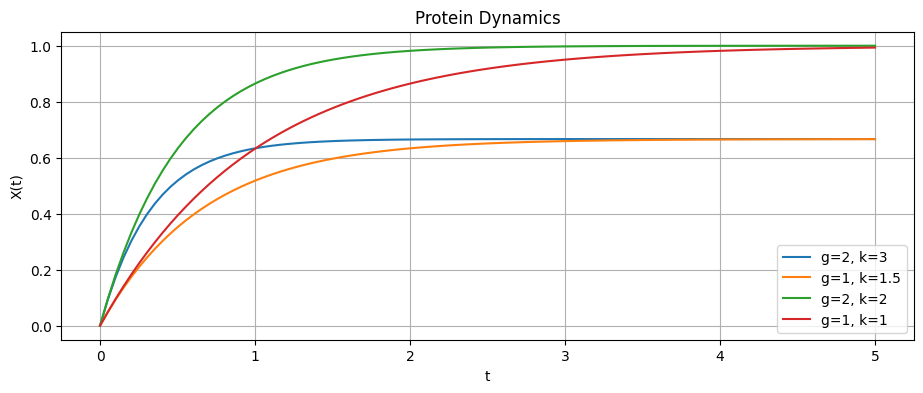

In [192]:
plt.figure(figsize=(11, 4))
plt.tight_layout()

# ADD PLOT CODE HERE
t = np.linspace(0, 5, 100)

# Plot the four curves as requested
plt.plot(t, a2d_x(t, 2, 3), label='g=2, k=3')
plt.plot(t, a2d_x(t, 1, 1.5), label='g=1, k=1.5')
plt.plot(t, a2d_x(t, 2, 2), label='g=2, k=2')
plt.plot(t, a2d_x(t, 1, 1), label='g=1, k=1')

# Add labels and legend
plt.xlabel('t')
plt.ylabel('X(t)')
plt.title('Protein Dynamics')
plt.legend()
plt.grid(True)
plt.show();

OR ADD IMAGE HERE

To insert an image, choose Edit→Insert Image.

### 2f. Plotting four curves (Numerical)
Check the above results by plotting the same results using numerical integration. Use a time step less than $0.1 / k$.

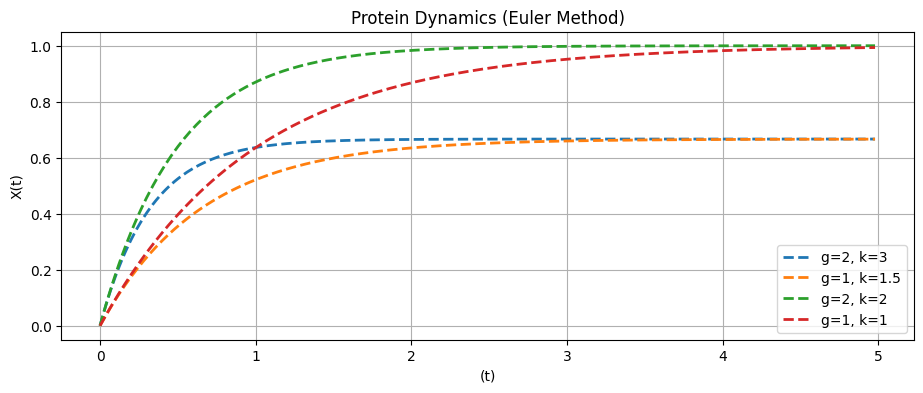

In [193]:
plt.figure(figsize=(11, 4))
plt.tight_layout()

# ADD PLOT CODE HERE
dt = 0.02
params_list = [(2, 3), (1, 1.5), (2, 2), (1, 1)]

for g, k in params_list:
    func = lambda x, t, g=g, k=k: dx2(x, g, k)
    
    t_num, x_num = euler(func, x0=0, t0=0, t_end=5, dt=dt)
    
    plt.plot(t_num, x_num, linestyle='--', linewidth=2, label=f'g={g}, k={k}')
    
plt.xlabel('(t)')
plt.ylabel('X(t)')
plt.title('Protein Dynamics (Euler Method)')
plt.legend()
plt.grid(True)
plt.show();

### 2g. Fixed points (Analytical)
Derive the expression for the fixed point(s) to which $x(t)$ settles in general, so in terms of $g$ and $k$. Show how you derived your solution first, and then enter it in the code cell.

YOUR ANSWER HERE\
$$\frac{dx}{dt} = g-k \cdot x$$
Step 1 (Definition of equilibrium):$$\frac{dx}{dt} = 0$$Step 2:$$0 = g - k \cdot x$$Step 3:$$k \cdot x = g$$Result:$$x = \frac{g}{k}$$

In [194]:
def a2g_x(g, k):
    x = g/k  # YOUR CODE HERE
    return x

### 2h. dx/dt versus x(t) (Analytical)
Plot $dx/dt$ versus $x(t)$ for the values $g=2$ and $k=3$. Try a few other parameter values yourself. Use this figure to explain whether this ODE is unstable, locally stable, or globally stable. You may either add code to plot the figure below, or insert an image containing your figure.

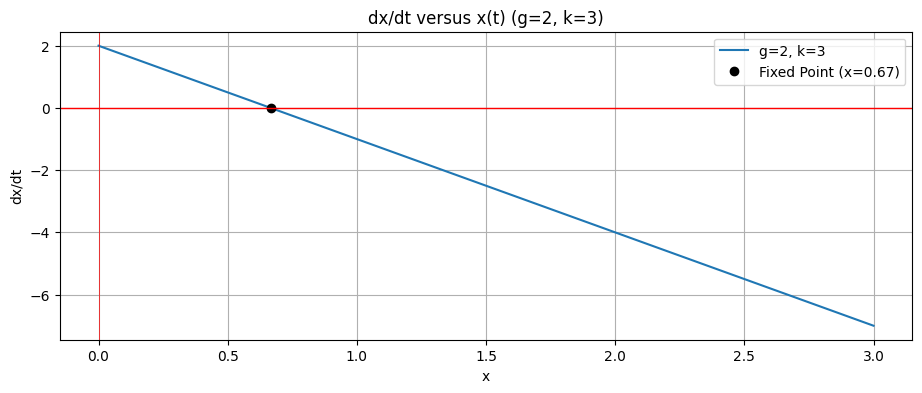

In [195]:
plt.figure(figsize=(11, 4))
plt.tight_layout()

# ADD PLOT CODE HERE
x_vals = np.linspace(0, 3, 100)

g = 2
k = 3

# Plot the curve
plt.plot(x_vals, dx2(x_vals, g, k), label=f'g={g}, k={k}')

# 3. USE YOUR FUNCTION HERE
# Calculate the fixed point using a2g_x to place the marker accurately
fixed_point = a2g_x(g, k) 

# Plot the fixed point (black dot)
plt.plot(fixed_point, 0, 'ko', label=f'Fixed Point (x={fixed_point:.2f})')

# Add reference lines
plt.axhline(0, color='red', linewidth=1)
plt.axvline(0, color='red', linewidth=0.5)

plt.xlabel('x')
plt.ylabel('dx/dt')
plt.title(f'dx/dt versus x(t) (g={g}, k={k})')
plt.legend()
plt.grid(True)
plt.show();

OR ADD IMAGE HERE

To insert an image, choose Edit→Insert Image.

ADD YOUR EXPLANATION HERE\
The ODE is globally stable, because we know the fixed point is 0.67, as shown in the figure:
- Left side: When $x < 0.67$, $dx/dt > 0$ (above the 0 line), concentration increases $\rightarrow$ pushing to the right.
- Right side: When $x > 0.67$, $dx/dt < 0$ (below the zero line), concentration decreases $\leftarrow$ pushing to the left.

### 2i. Adaptable production rate (Thought experiment)
Suppose that $g$ can now change over time, that is, $g(t)$ is now a function of time $t$. Suppose that at time $t=t_0$ the stable concentration of the protein is too low for the purpose of the cell. Biological cells can adapt to such situations. In this example, the cell can do nothing to change $k$ since the decay rate depends on the chemistry of the protein molecule. But it *can* change the rate at which it produces new protein molecules, $g$. Assume that the cell can freely change $g$ over time in order to make the new stable concentration, say, $100\%$ higher. Sketch manually a possible graph of $g$ over time of how the cell could achieve its goal, and explain its features. (Can you find a second possible shape, depending on how ‘opportunistic’ the cell changes $g$?)

ADD SKETCH IMAGE HERE

To insert an image, choose Edit→Insert Image.

### 2j. Mean-field approximation model (Explain)
Explain briefly why you think this model is called a ‘mean-field’ or ‘mean-field approximation’ model.

YOUR ANSWER HERE

## 3. Rabbit population
Consider a population of rabbits and assume unlimited resources and space. Let us assume that each rabbit has a constant rate $k$ of dying at any given time.

Consider the case where each rabbit can always easily find another rabbit, so that the reproduction only depends on the population of rabbits $x(t)$ itself (i.e., the more rabbits, the more new rabbits). Consider that each rabbit has a constant reproduction rate $r$.

A simple ODE that models this situation can be:
$$\frac{dx}{dt} = r\cdot x - k \cdot x.$$

In [196]:
def dx3a(x, r, k):
    """The ODE model. Can be useful for your numerical solutions."""
    return r * x - k * x

### 3a. ODE model (Explain)

Explain briefly why this ODE can be used to model this situation.

YOUR ANSWER HERE\
$$\frac{dx}{dt} = r\cdot x - k \cdot x$$<br>
Step 1:$$\frac{dx}{dt} = (r - k)x$$$$\frac{1}{x} dx = (r - k) \, dt$$
Step 2:$$\int \frac{1}{x} dx = \int (r - k) \, dt$$$$\ln|x| = (r - k)t + C_1$$
Step 3:$$|x| = e^{(r - k)t + C_1}$$
Result:$$x(t) = C e^{(r - k)t}$$

### 3b. Solving the ODE (Analytical)
Solve this ODE for the general case with an additional constant $C$. The constant $C$ has to be simplified to the simplest form! (Tip: remember that logarithms do not operate on negative arguments, be mindful when integrating.)

Show how you derived your solution first, and then enter it in the code cell.

YOUR ANSWER HERE

In [197]:
def a3b_x(t, r, k, C):
    # YOUR CODE HERE
    return C * np.exp((r - k) * t)

In [198]:
_x = a3b_x(np.array([1, 2, 3]), 1, 1, 1)
assert isinstance(_x, np.ndarray), "Your function should return a numpy array"
assert _x.shape == (3, ), "Your function should return a numpy array that has the same shape as t"

### 3c. Three typical behaviors (Analytical)
Sketch the three typical behaviors of $x(t)$ in one figure. What are the fixed points, if any? If there are fixed points, are they stable (mathematically speaking)?

ADD SKETCH IMAGE HERE

To insert an image, choose Edit→Insert Image.

INSERT ANSWER HERE

### 3d. Checking your results (Numerical)
Check your results numerically using a plot. Negative numbers of rabbits are not possible.

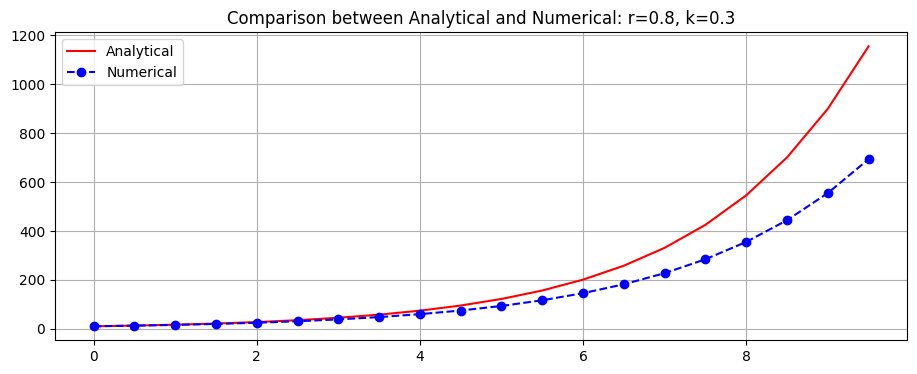

In [202]:
plt.figure(figsize=(11, 4))
plt.tight_layout()

# ADD PLOT CODE HERE
r, k, x0 = 0.8, 0.3, 10  # Growth, Decay, Initial Population
dt = 0.5                 # Step size

model = lambda x, t: dx3a(x, r, k)
t, x_euler = euler(model, x0, 0, 10, dt)

# 3. Calculate Analytical Solution for comparison
x_analytical = a3b_x(t, r, k, x0)

# 4. Plot the results
plt.plot(t, x_analytical, 'r-', label='Analytical')
plt.plot(t, x_euler, 'bo--', label='Numerical')

# 5. Formatting
plt.title(f'Comparison between Analytical and Numerical: r={r}, k={k}')
plt.legend()
plt.grid(True)
plt.show();

### 3e. Fluctuations (Analytical)
In biology it is impossible to fix a rate accurately up to an infinite number of digits. There is just too much fluctuation and environmental influence for that. So consider that $k$ and $r$ are both very slightly (infinitesimally) changed during a simulation. Which fixed points of the three typical cases are affected by this and which remain unchanged (stable)?

YOUR ANSWER HERE

### 3f. Improving the model (Analytical)
Now assume that the reproduction also depends on the concentration of rabbits, meaning that rabbits find a mate more easily if there are more rabbits. This means that if the density is low, then reproduction should be low, and if the density is high, then reproduction is high. We'll assume that there is no limit to the number of partners that a rabbit can have in a given time-frame. We can then change the ODE to include this effect in the simplest manner as follows: $$\frac{dx}{dt} = r \cdot x \cdot x - k \cdot x.$$ Explain briefly why.

In [213]:
def dx3f(x, r, k):
    """The ODE model. Can be useful for your numerical solutions."""
    return r * x * x - k * x

YOUR ANSWER HERE\
This model modifies the reproduction term to $r \cdot x \cdot x$ because reproduction now depends on encounter interactions between rabbits: The problem assumes that more rabbits increase the likelihood of finding mates. This implies that the reproduction success rate for “each” rabbit is no longer fixed but proportional to the population density (i.e., the number of existing rabbits $x$). Therefore, the total reproduction rate for the entire population equals “the total number of rabbits” multiplied by “the probability of each rabbit finding a mate,” expressed as $x \cdot (rx) = rx^2$.

### 3g. Bonus: Solving the model (Analytical)
Solve this ODE for the general case (i.e. not assuming any values already for the rates). Use also the constraint $x(0)=x_0$ in the solution, in order to see clearly how the initial condition alters the solution. Thus there should be no integration constant $C$ in your solution.

Hint: We suggest you use this [list of Integrals](http://www.wikiwand.com/en/List_of_integrals_of_rational_functions) to find the solution of difficult integrals (unless you feel confident: then use the substitution rule).

Show how you derived your solution first, and then enter it in the code cell.

YOUR ANSWER HERE 
$$\frac{dx}{dt} = r \cdot x^2 - k \cdot x$$
(with $x(0)=x_0$)<br>
Step 1: Separate variables and use partial fractions to integrate:
$$\int \frac{1}{x(rx - k)} dx = \int dt$$
$$\frac{1}{k} \int \left( \frac{r}{rx - k} - \frac{1}{x} \right) dx = \int dt$$
$$\frac{1}{k} \left( \ln|rx - k| - \ln|x| \right) = t + C_1$$
$$\ln \left| \frac{rx - k}{x} \right| = kt + kC_1$$

Step 2: Solve for $x(t)$ in the general form:
$$\frac{rx - k}{x} = e^{kt + kC_1} = C_{new} e^{kt}$$
$$rx - k = x C_{new} e^{kt}$$
$$x (r - C_{new} e^{kt}) = k$$
$$x(t) = \frac{k}{r - C_{new} e^{kt}}$$

Step 3: Apply the initial condition $x(0) = x_0$ to find constant $C_{new}$:
$$x_0 = \frac{k}{r - C_{new} e^{0}}$$
$$r - C_{new} = \frac{k}{x_0} \implies C_{new} = r - \frac{k}{x_0} = \frac{rx_0 - k}{x_0}$$

Result: Substitute $C_{new}$ back into the equation and simplify:
$$x(t) = \frac{k}{r - \left( \frac{rx_0 - k}{x_0} \right) e^{kt}}$$
$$x(t) = \frac{k x_0}{r x_0 - (r x_0 - k) e^{kt}}$$

In [214]:
def a3g_x(t, r, k, x0):
    # YOUR CODE HERE
    return (k * x0) / (r * x0 - (r * x0 - k) * np.exp(k * t))

In [215]:
_x = a3g_x(np.array([1, 2, 3]), 1, 1, 1)
assert isinstance(_x, np.ndarray), "Your function should return a numpy array"
assert _x.shape == (3, ), "Your function should return a numpy array that has the same shape as t"

### 3h. Studying the equation
Now study the equation numerically for $k=1$, $r=1$ and $x_0=0.5$, $x_0=1.0$ and $x_0=1.1$. Plot the results in a single figure. Note that your numerical integrator may not be able to compute all results due to overflow. Stop such an integration if $x$ exceeds a limit of your own choosing.

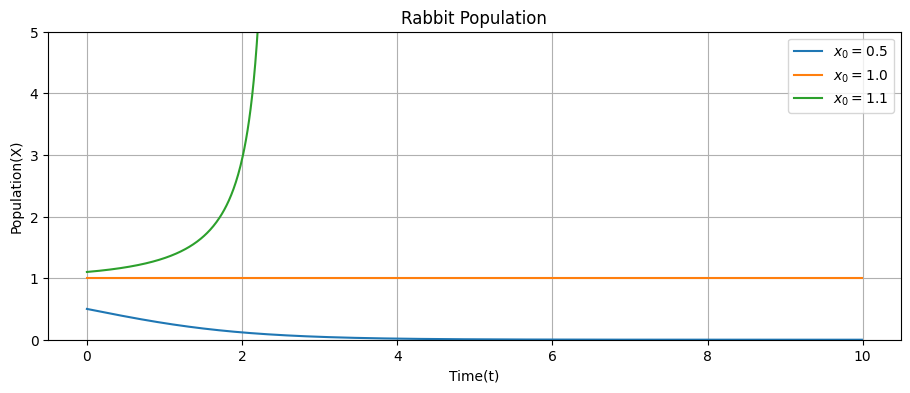

In [219]:
plt.figure(figsize=(11, 4))
plt.tight_layout()

# ADD PLOT CODE HERE
r = 1.0
k = 1.0
limit = 100.0  # Threshold to stop plotting the explosion

# Iterate over the specified initial conditions
for x0 in [0.5, 1.0, 1.1]:
    
    func = lambda x, t: dx3f(x, r, k)
    
    # Solve using the provided euler function
    t_vals, x_vals = euler(func, x0, 0, 10, 0.01)
    
    # keep only points where x is within the limit
    valid_mask = x_vals <= limit
    
    plt.plot(t_vals[valid_mask], x_vals[valid_mask], label=f'$x_0={x0}$')

plt.ylim(0, 5)
plt.xlabel('Time(t)')
plt.ylabel('Population(X)')
plt.title('Rabbit Population')
plt.legend()
plt.grid(True)

plt.show();

ADD ANALYSIS HERE